In [2]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
import yfinance as yf

In [4]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [8]:
stock = "GOOG"
google_data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [9]:
google_data.head()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2005-01-04,4.826998,5.036209,4.801683,4.998238,552298420
2005-01-05,4.802429,4.886560,4.770662,4.800940,330698912
2005-01-06,4.679335,4.861743,4.658736,4.841392,417041336
2005-01-07,4.810867,4.820795,4.685042,4.731203,387964757
2005-01-10,4.840896,4.916341,4.760735,4.826998,302714411


In [10]:
google_data.shape

(5034, 5)

In [11]:
google_data.describe()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
count,5034.000000,5034.000000,5034.000000,5034.000000,5.034000e+03
mean,48.622595,49.114276,48.115763,48.601534,1.089007e+08
std,46.536099,47.020771,46.046481,46.505389,1.420600e+08
min,4.342810,4.427436,4.282751,4.350503,1.584340e+05
25%,13.293417,13.442322,13.168895,13.327480,2.657822e+07
50%,28.051302,28.349772,27.823861,28.092407,5.055278e+07
75%,64.534372,65.038680,63.876736,64.457147,1.327608e+08
max,198.160004,202.880005,196.690002,198.529999,1.650833e+09


In [12]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5034 entries, 2005-01-04 to 2025-01-03
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, GOOG)   5034 non-null   float64
 1   (High, GOOG)    5034 non-null   float64
 2   (Low, GOOG)     5034 non-null   float64
 3   (Open, GOOG)    5034 non-null   float64
 4   (Volume, GOOG)  5034 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 236.0 KB


In [13]:
google_data.isna().sum()

Price   Ticker
Close   GOOG      0
High    GOOG      0
Low     GOOG      0
Open    GOOG      0
Volume  GOOG      0
dtype: int64

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Google data')

<Figure size 1500x500 with 0 Axes>

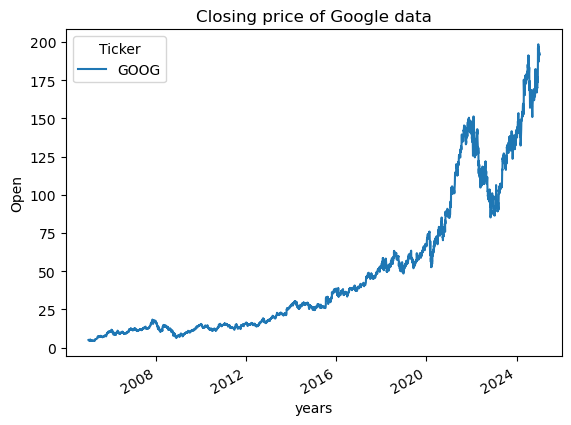

In [33]:
plt.figure(figsize = (15,5))
google_data['Open'].plot()
plt.xlabel("years")
plt.ylabel("Open")
plt.title("Closing price of Google data")

In [34]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")

In [35]:
google_data.columns

MultiIndex([( 'Close', 'GOOG'),
            (  'High', 'GOOG'),
            (   'Low', 'GOOG'),
            (  'Open', 'GOOG'),
            ('Volume', 'GOOG')],
           names=['Price', 'Ticker'])

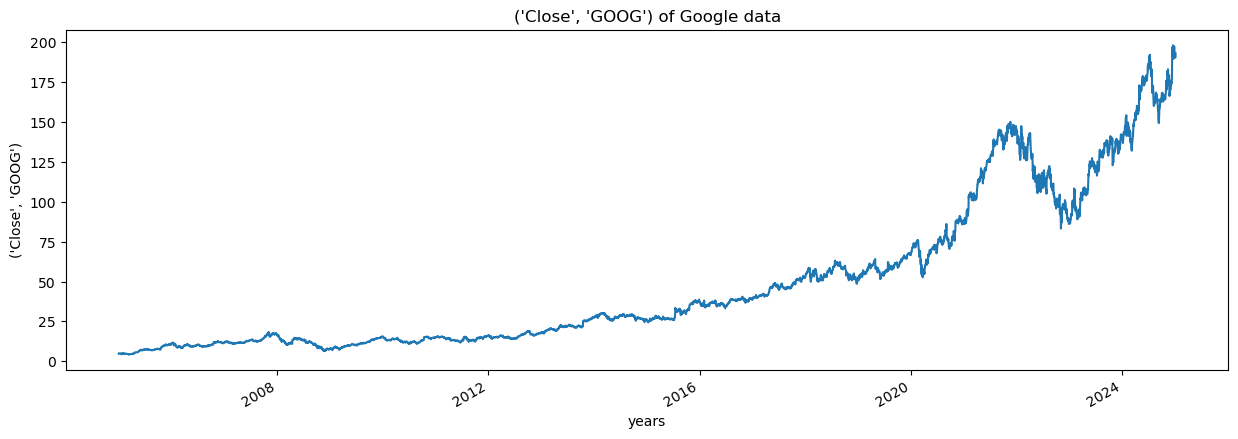

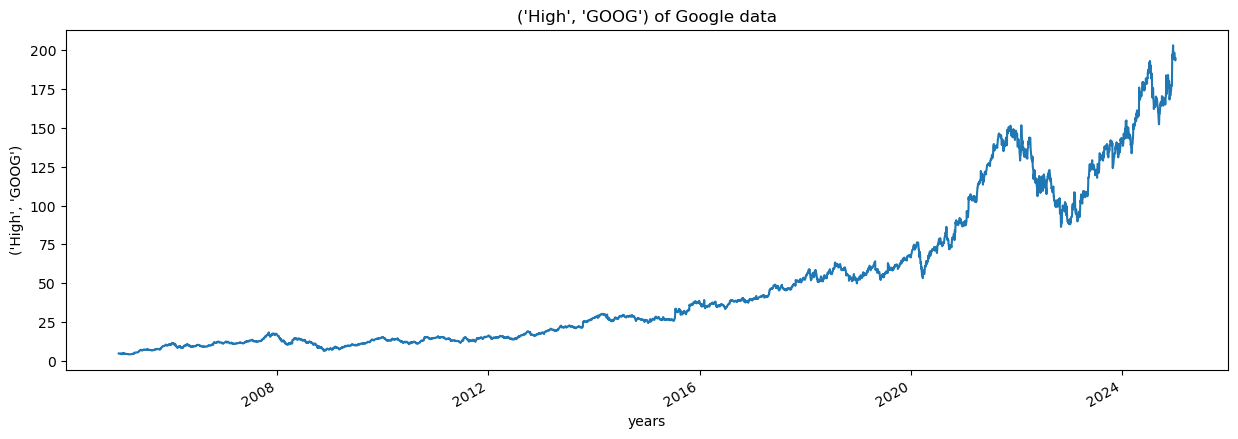

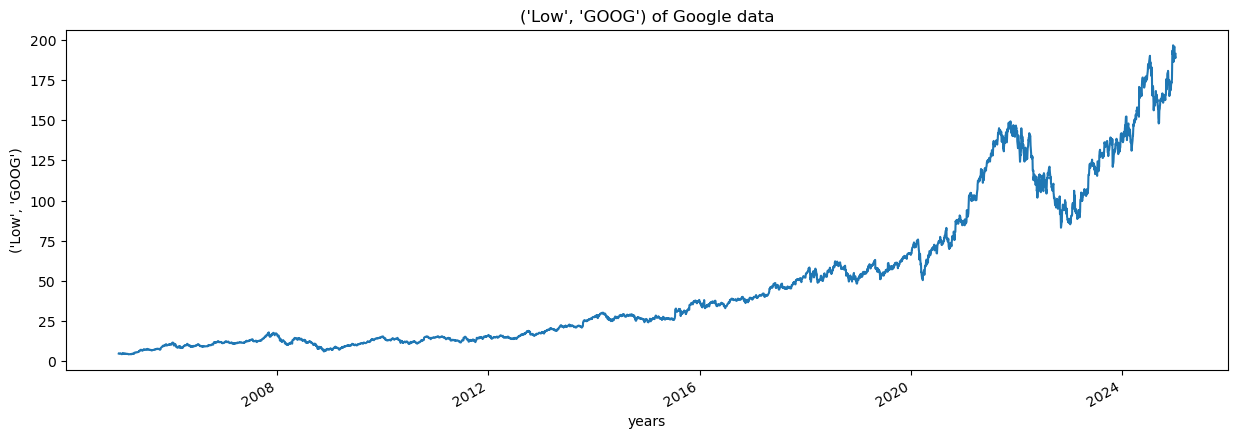

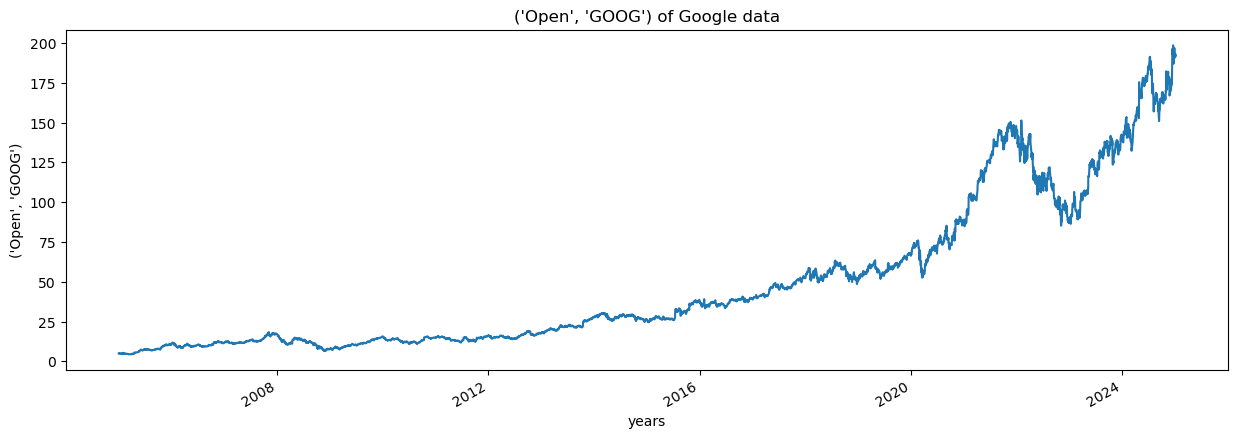

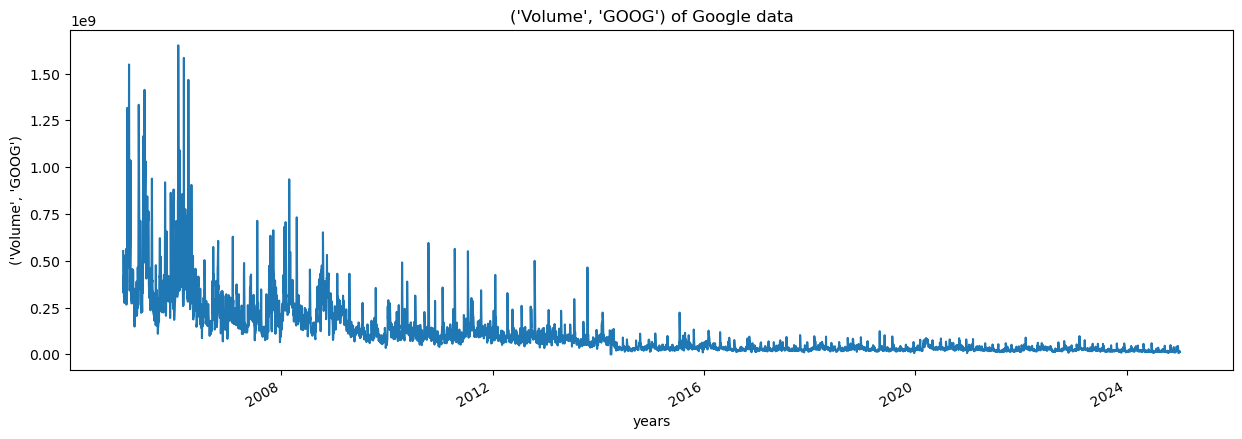

In [36]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

In [37]:
# 10, 20, 30, 40, 50, 60, 70, 80, 90, 100

# MA for 5 days ==> null null null null 30 40 50 60 70 80

In [38]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [39]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [40]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [41]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

2004 0
2005 251
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 252


In [43]:
google_data['MA_for_250_days'] = google_data['Open'].rolling(250).mean()

In [44]:
google_data['MA_for_250_days'][0:250].tail()

Date
2005-12-22         NaN
2005-12-23         NaN
2005-12-27         NaN
2005-12-28         NaN
2005-12-29    6.886716
Name: MA_for_250_days, dtype: float64

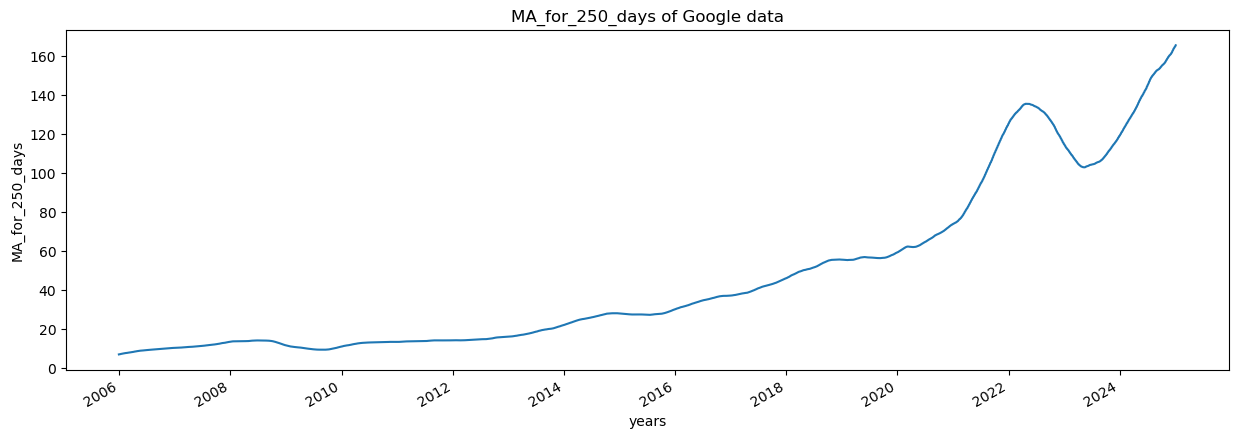

In [45]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

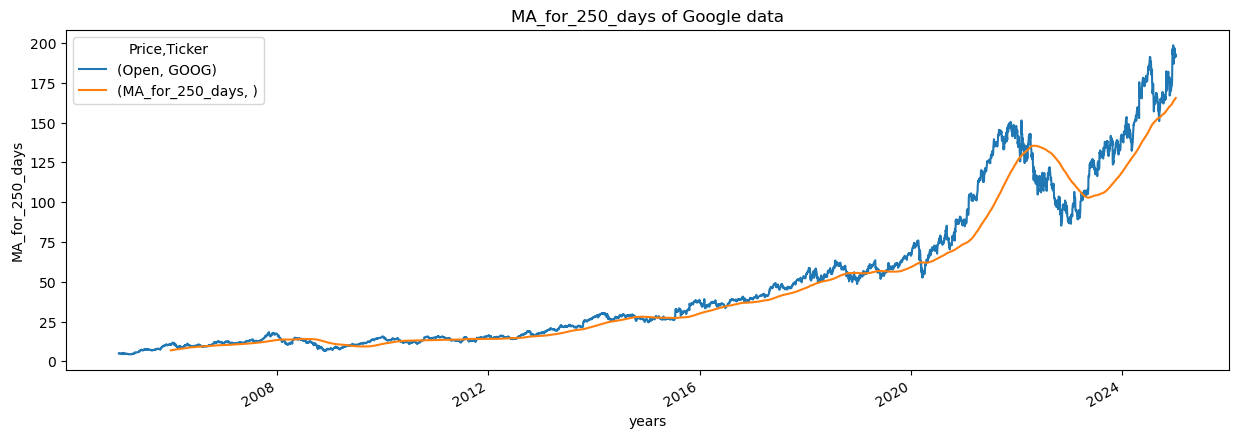

In [47]:
plot_graph((15,5), google_data[['Open','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

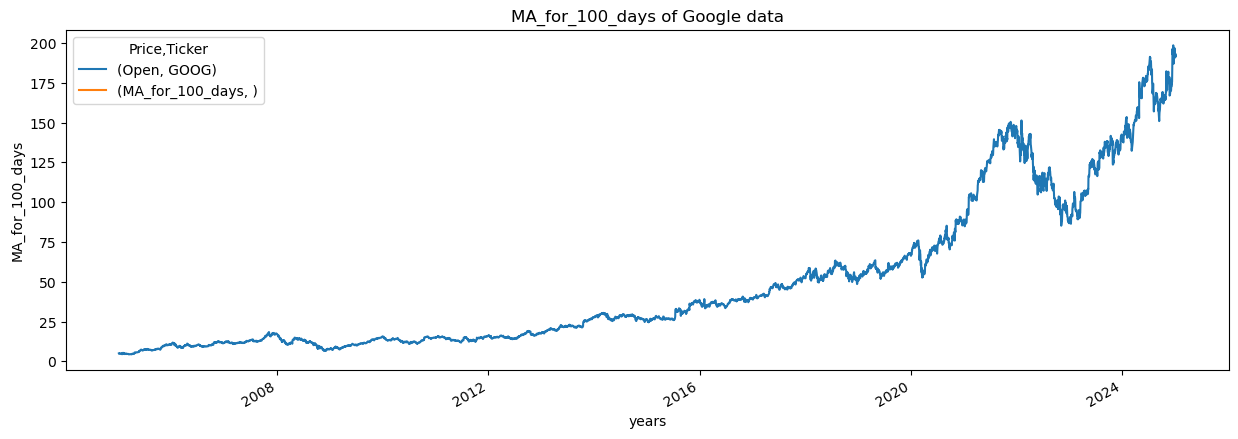

In [49]:
google_data['MA_for_100_days'] = google_data['Open'].rolling(100).mean()
plot_graph((15,5), google_data[['Open','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

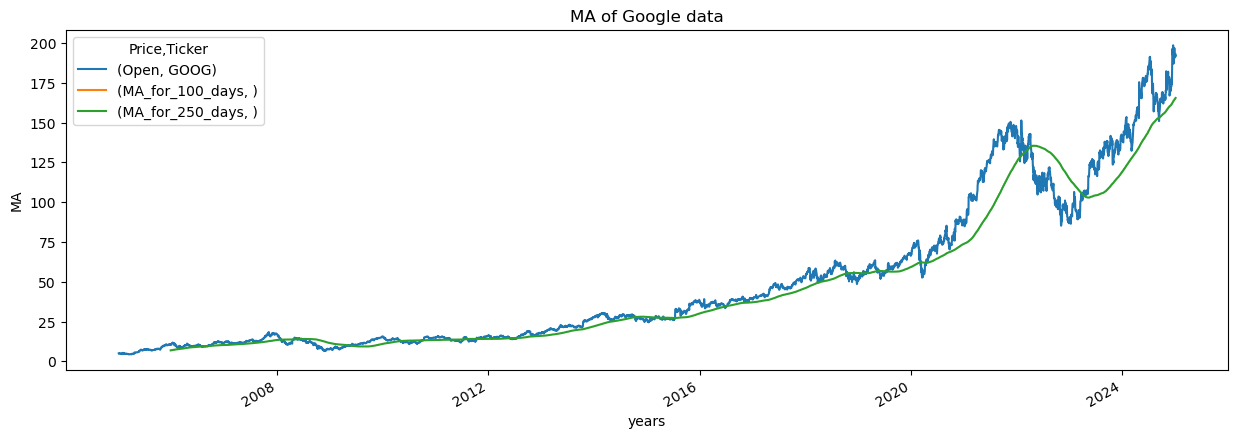

In [50]:
plot_graph((15,5), google_data[['Open','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [51]:
google_data['percentage_change_cp'] = google_data['Open'].pct_change()
google_data[['Open','percentage_change_cp']].head()

Price,Open,percentage_change_cp
Ticker,GOOG,
Date,,
2005-01-04,4.998238,NaN
2005-01-05,4.800940,-0.039474
2005-01-06,4.841392,0.008426
2005-01-07,4.731203,-0.022760
2005-01-10,4.826998,0.020247


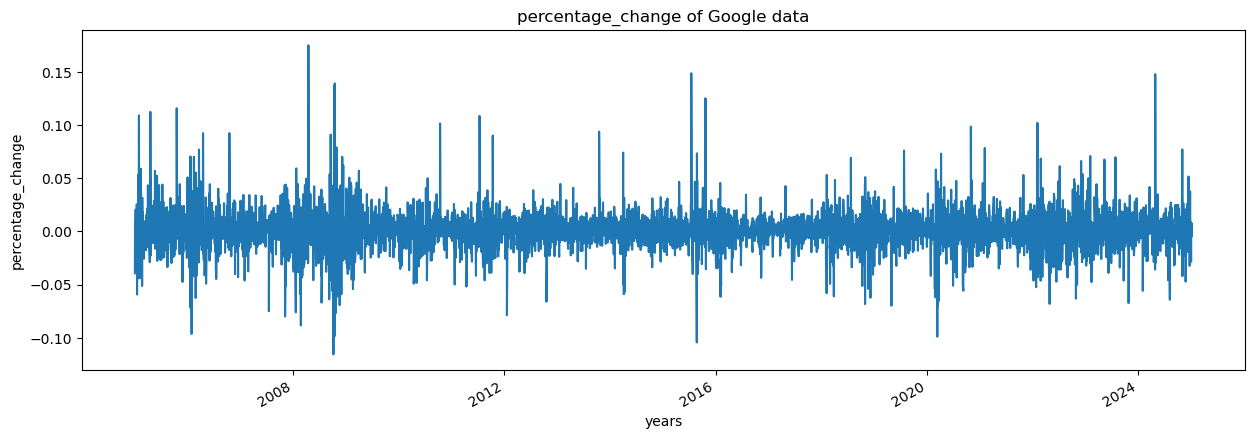

In [52]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')

In [54]:
Adj_close_price = google_data[['Open']]

In [55]:
max(Adj_close_price.values),min(Adj_close_price.values) 

(array([198.52999878]), array([4.35050344]))

In [56]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.00333575],
       [0.00231969],
       [0.00252802],
       ...,
       [0.96866306],
       [0.96371914],
       [0.97010502]])

In [57]:
len(scaled_data)

5034

In [58]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [59]:
x_data[0],y_data[0]

(array([[0.00333575],
        [0.00231969],
        [0.00252802],
        [0.00196056],
        [0.00245389],
        [0.00259703],
        [0.00243216],
        [0.00256636],
        [0.0026456 ],
        [0.0032808 ],
        [0.00375113],
        [0.00219828],
        [0.002459  ],
        [0.00171134],
        [0.00084864],
        [0.00050739],
        [0.00172027],
        [0.00188131],
        [0.00235037],
        [0.00243855],
        [0.00514422],
        [0.00392239],
        [0.00398374],
        [0.00382909],
        [0.0027683 ],
        [0.00325396],
        [0.00213054],
        [0.00145188],
        [0.00096494],
        [0.00233886],
        [0.00247946],
        [0.00287948],
        [0.0029664 ],
        [0.00270951],
        [0.00230052],
        [0.0010314 ],
        [0.00177012],
        [0.00136753],
        [0.00178802],
        [0.00136114],
        [0.00138415],
        [0.00145699],
        [0.00159503],
        [0.00176373],
        [0.00113876],
        [0

In [60]:
int(len(x_data)*0.7)

3453

In [61]:
4908-100-int(len(x_data)*0.7)

1355

In [63]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [64]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3453, 100, 1)
(3453, 1)
(1481, 100, 1)
(1481, 1)


In [73]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [74]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [75]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [76]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 147s 41ms/step - loss: 2.2115e-04
Epoch 2/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 142s 41ms/step - loss: 4.4189e-05


In [77]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [78]:
predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step


In [79]:
predictions

array([[0.26877457],
       [0.2705521 ],
       [0.26880157],
       ...,
       [0.963135  ],
       [0.9591581 ],
       [0.9561332 ]], dtype=float32)

In [80]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 56.541016],
       [ 56.886173],
       [ 56.546257],
       ...,
       [191.37157 ],
       [190.59935 ],
       [190.01196 ]], dtype=float32)

In [81]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 56.30170437],
       [ 55.30129887],
       [ 55.79900941],
       ...,
       [192.44500732],
       [191.48500061],
       [192.7250061 ]])

In [82]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [83]:
rmse

2.7163900445837617

In [84]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2019-02-15,56.301704,56.541016
2019-02-19,55.301299,56.886173
2019-02-20,55.799009,56.546257
2019-02-21,55.343148,56.522865
2019-02-22,54.847925,56.327862


<Figure size 640x480 with 0 Axes>

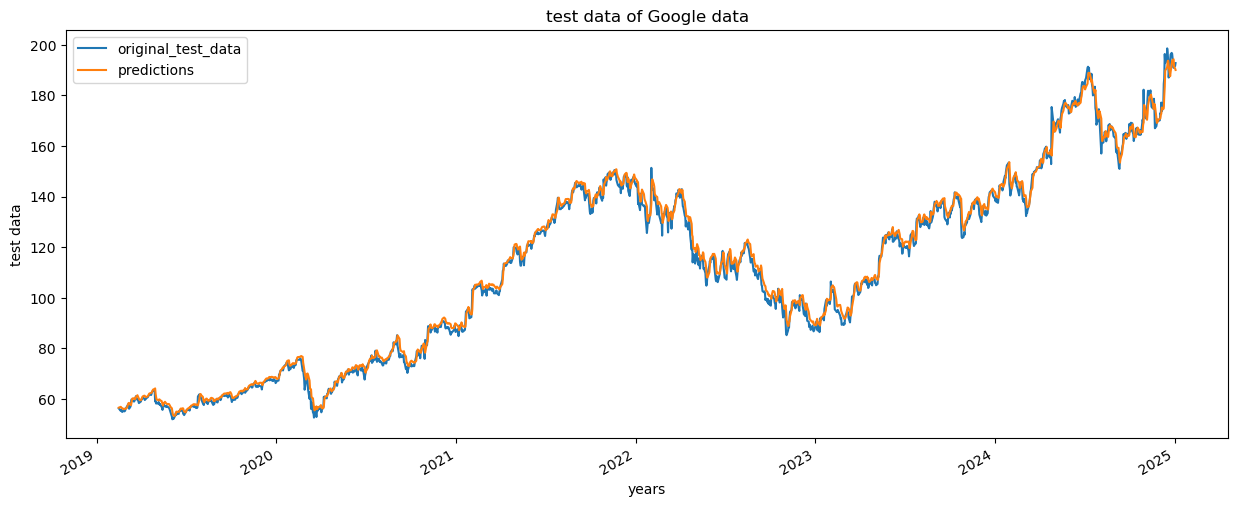

In [85]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

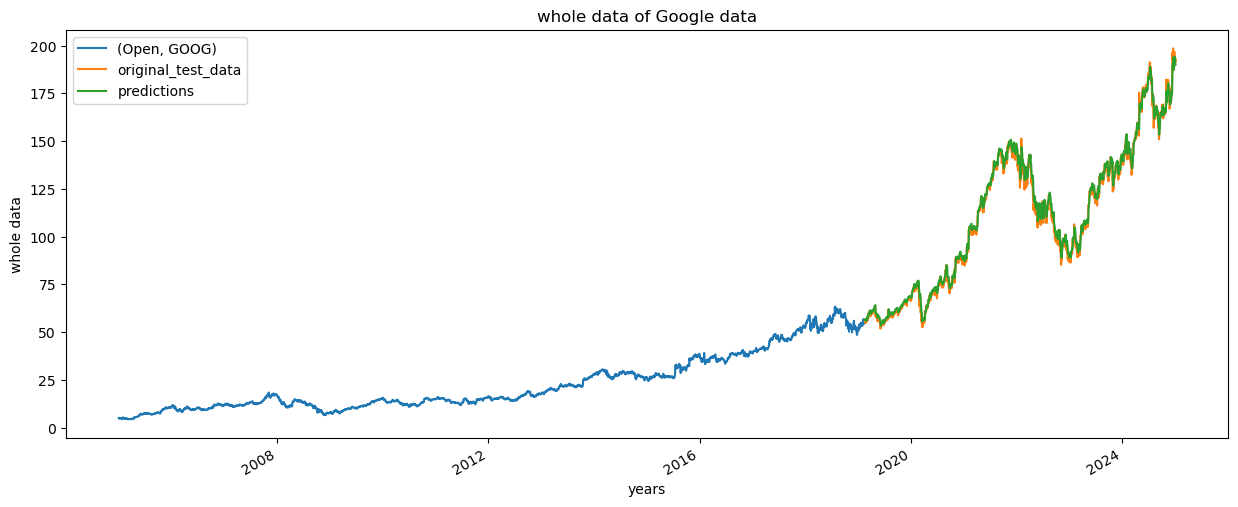

In [86]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [87]:
model.save("Latest_stock_price_model.keras")